In [2]:
%pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 36.1 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 50.6 MB/s eta 0:00:00:00:0100:01
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=854337 sha256=4087cdef2acf2e703100985b45d05ae36a20f13c9d8e488271d64b8b1869ef1d
  Stored in directory: /home/codespace/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def createDataFrame(stock, start, end):
    df = stock.history(start=start, end=end)

    df["Change"] = df["Close"].pct_change() # 전날 대비 변화율
    df.index = pd.to_datetime(df.index).strftime("%Y-%m-%d") # 날짜 형식 간단하게 만들기
	
    # 지표 데이터
    # df2 = pd.read_csv("/Users/ryujonghyeok/Jonghyeok/Sejong/SAI/자료모음집.csv") 
    # df = pd.merge(df, df2, on="Date") """

    # df.set_index("Date", inplace=True)

    return df

In [ ]:
def buy(현금보유량, 주식보유량, 현재주가):
    if 주식보유량 == 0:
        주식보유량 = 현금보유량 // 현재주가
        현금보유량 -= 주식보유량 * 현재주가
        # print(f"Bought at {현재주가} with {주식보유량} stocks")
    return 현금보유량, 주식보유량


def sell(현금보유량, 주식보유량, 현재주가):
    if 주식보유량 > 0:
        현금보유량 += 주식보유량 * 현재주가
        주식보유량 = 0
        # print(f"Sold at {현재주가} with {주식보유량} stocks")
    return 현금보유량, 주식보유량

def total_asset(현금보유량, 주식보유량, 현재주가):
    return 현금보유량 + 주식보유량 * 현재주가

In [ ]:
""" def score_calculate(i):
    bullishWords = {'rally': 0.2074, 'rise': 0.1983, 'high': 0.1416, 'gain': 0.0460, 'up': 0.0678, 'recovery': 0.0278, 'soar': 0.0056, 'bull': 0.0010, 'boom': 0.0010} # 상승 🤑
    bearishWords = {'fall': 0.1103, 'low': 0.0597, 'drop': 0.0465, 'down': 0.0288, 'decline': 0.0243, 'sink': 0.0137, 'recession': 0.0101, 'loss': 0.0061, 'bear': 0.0040} # 하락 🤑

    물가지수 = df.iloc[i]["물가지수"]
    콜금리 = df.iloc[i]["콜금리"]
    회사채금리 = df.iloc[i]["회사채"]
    주택매매지수 = df.iloc[i]["주택지수"]
    국민총소득 = df.iloc[i]["GNI"]

    뉴스 = df.iloc[i]["Title"]

    score = (-51.2)*물가지수 + (-306.67)*콜금리 + (40.01)*회사채금리 + 26.84*주택매매지수 + 4.35*국민총소득 # 🤑

    for word in 뉴스.split():
        if word in bullishWords:
            score += bullishWords[word] * 500 # 🤑
        elif word in bearishWords:
            score -= bearishWords[word] * 500 # 🤑

    return score """

""" score_plt = []
# 복합적인 요소를 분석하여 일정 조건에 따라 매수 및 매도 반복
def strategy_score(df):
    global score_plt

    현금보유량 = 1000000
    주식보유량 = 0

    현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, df.iloc[0].Close)
    for i in range(len(df)):
        
        # 점수 계산하기
        score = score_calculate(i)

        현재주가 = df.iloc[i].Close

        # 점수가 일정 기준보다 클 때 매수하기
        if score > 50: # 🤑
            현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, 현재주가)

        # 점수가 일정 기준보다 작을 때 매도하기
        elif score < -900: # 🤑
            현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, 현재주가)

        score_plt.append(total_asset(현금보유량, 주식보유량, 현재주가))

    현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, df.iloc[-1].Close)


    print(f"가중치 계산 - 현금보유량: {현금보유량:.2f} profit: {(현금보유량-1000000)/1000000*100:.2f}%")
 """

In [ ]:
buyAndHold_plt = []
# 시작시점에 매수 후 종료시점에 매도
def strategy_buyAndHold(df):
    global buyAndHold_plt

    현금보유량 = 1000000
    주식보유량 = 0

    현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, df.iloc[0].Close)
    
    buyAndHold_plt = []
    for i in range(1, len(df)-1):
        buyAndHold_plt.append(total_asset(현금보유량, 주식보유량, df.iloc[i].Close))
    
    현금보유량 += 주식보유량 * df.iloc[-1].Close

    print(f"그냥 가만히 - 현금보유량: {현금보유량:.2f}, profit: {(현금보유량-1000000)/1000000*100:.2f}%")


In [ ]:
difference_plt = []
# 최고점 대비 일정 비율 하락하면 매도, 최저점 대비 일정 비율 상승하면 매수
def strategy_difference(df):
    global difference_plt
    현금보유량 = 1000000
    주식보유량 = 0
    dif1 = 0.36 # 일정 비율 하락하는 정도 🤑
    dif2 = 0.02 # 일정 비율 상승하는 정도 🤑

    minimum = float('inf')
    maximum = float('-inf')

    for i in range(2, len(df)):
        price = df.iloc[i].Close
        if price > maximum:
            maximum = price
        elif price < minimum:
            minimum = price
        if 주식보유량 > 0 and price < maximum * (1-dif1):
        #print(f"Sold at {price(hist, i)}")
            현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, price)
            maximum = float('-inf')
        elif 주식보유량 == 0 and price > minimum * (1+dif2):
            #print(f"Bought at {price(hist, i)}")
            현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, price)
            minimum = float('inf')

        difference_plt.append(total_asset(현금보유량, 주식보유량, price))

    현금보유량 += 주식보유량 * df.iloc[-1].Close
    주식보유량 = 0

    print(f"변화율 비교 - 현금보유량: {현금보유량:.2f}, profit: {(현금보유량-1000000)/1000000*100:.2f}%")

In [ ]:
def score_calculate(i):
    
    pass

# plt: for the purporse of plotting
score_plt = []
def strategy_score(df):
    global score_plt

    현금보유량 = 1000000
    주식보유량 = 0

    현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, df.iloc[0].Close)
    for i in range(len(df)):
        
        # 점수 계산하기
        score = score_calculate(i)

        현재주가 = df.iloc[i].Close

        # 점수가 일정 기준보다 클 때 매수하기
        if score > 50: # 🤑
            현금보유량, 주식보유량 = buy(현금보유량, 주식보유량, 현재주가)

        # 점수가 일정 기준보다 작을 때 매도하기
        elif score < -900: # 🤑
            현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, 현재주가)

        score_plt.append(total_asset(현금보유량, 주식보유량, 현재주가))

    현금보유량, 주식보유량 = sell(현금보유량, 주식보유량, df.iloc[-1].Close)


    print(f"가중치 계산 - 현금보유량: {현금보유량:.2f} profit: {(현금보유량-1000000)/1000000*100:.2f}%")

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2024-01-02  29.865406  29.875398  27.237571  28.016930  79763800        0.0   
2024-01-03  26.568122  27.027742  25.858705  26.228401  62304900        0.0   
2024-01-04  24.939462  26.308335  24.779593  25.558952  75067000        0.0   
2024-01-05  25.628894  26.598097  25.379100  25.908665  73790500        0.0   
2024-01-08  26.468204  28.646411  26.408254  28.406609  73206500        0.0   
...               ...        ...        ...        ...       ...        ...   
2024-05-06  39.970001  41.380001  39.480000  41.299999  48404800        0.0   
2024-05-07  41.529999  41.910000  40.279999  40.360001  51508400        0.0   
2024-05-08  39.060001  40.500000  38.959999  40.410000  53735100        0.0   
2024-05-09  40.400002  40.619999  39.310001  39.959999  39132700        0.0   
2024-05-10  41.150002  42.240002  40.520000  41.0299

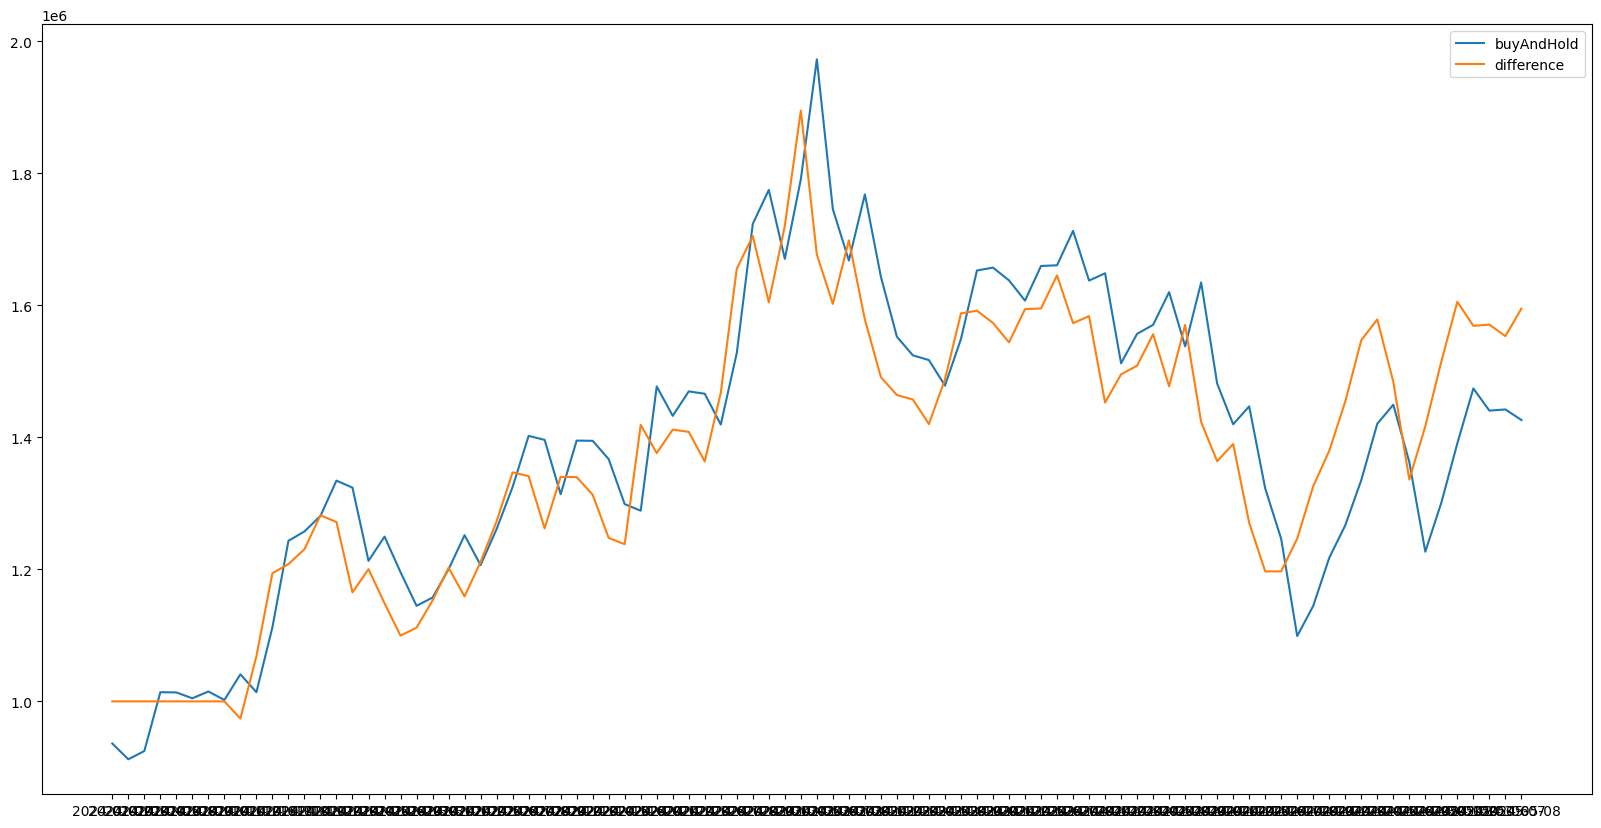

In [10]:
# Stock 정의하기
stock = yf.Ticker("SOXL")

# 데이터프레임 만들기
start="2024-01-01"
end="2024-12-31"

df = createDataFrame(stock, start, end)

strategy_buyAndHold(df)
strategy_difference(df)
#strategy_score(df)

# 그래프 그리기
plt.figure(figsize=(20, 10))
plt.plot(df.index[:-2], buyAndHold_plt, label="buyAndHold")
plt.plot(df.index[:-2], difference_plt, label="difference")
# plt.plot(df.index, score_plt, label="score")
plt.legend()
plt.show()